In [9]:
# Read the dataframe of recorded GTFS data
import geopandas as gpd
import pandas as pd
import shapely

# Convert to geopandas df
df = pd.read_csv("log.csv")
df['Coordinates'] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(shapely.Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates", crs="4326")

In [10]:
# Filter out erroneous points 
ATL_BOUNDS = {
    "minx": -85.7,  # Western boundary
    "maxx": -83.7,  # Eastern boundary
    "miny": 33.2,   # Southern boundary
    "maxy": 34.5    # Northern boundary
}
gdf = gdf.cx[ATL_BOUNDS["minx"]:ATL_BOUNDS["maxx"], ATL_BOUNDS["miny"]:ATL_BOUNDS["maxy"]]

In [14]:
# Map MARTA's bus stop inventory
stops = gpd.read_file("stops_inbounds.geojson")

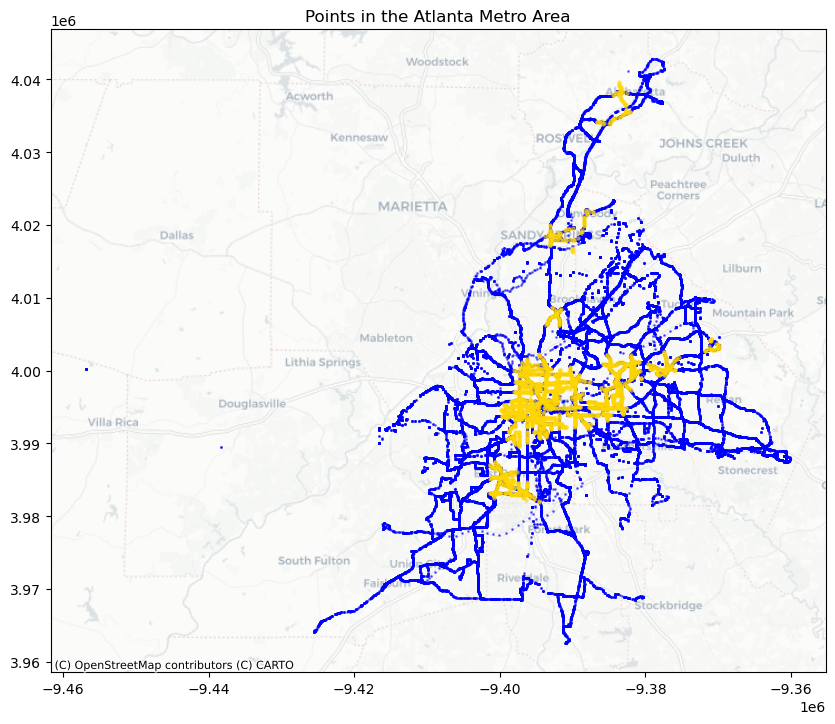

In [17]:
import matplotlib.pyplot as plt
import contextily as ctx

# Plot the points with reduced marker size and alpha transparency
fig, ax = plt.subplots(figsize=(10, 10))

# Convert to web mercantile
gdf = gdf.to_crs(epsg=3857)
stops = stops.to_crs(epsg=3857)

# Plot stops and bus
gdf.plot(ax=ax, markersize=1, alpha=0.5, color='blue')
stops.plot(ax=ax, markersize=5, alpha=.5, color="gold", marker="o")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.8)
ax.set_title("Points in the Atlanta Metro Area")
plt.show()